# Regression Using sklearn's LinearRegression and also building ANN using Tensorflow-Keras

The goal of this project was to build a linear regression model from the ground up using Pandas and Scikit Learn.

Also build an ANN model using Tensorflow Keras to fit the data. Compare the results.

## Import Libraries and mount the drive


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the data



### Get the input data --> X, Y



In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear Regression/data.csv") #Reading the given data
data.head()   #Showing the first few rows of the data


,Hours_of_Study,Test_Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [83]:
#Try homework on advertising.csv data
use_cols = ['TV','Radio','Newspaper','Sales']
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear Regression/Advertising.csv",usecols = use_cols) #Reading the given data
data.head()   #Showing the first few rows of the data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [79]:
## Hours_of_Study and Test_Scores are called Series according to Pandas.
X = data["Hours_of_Study"] #Hours of study column data from the given csv

Y = data["Test_Scores"] #Test scores columns of the given data

 
# check the type and shape of X
print("X shape is ",X.shape)
X = X.values.reshape(-1,1)
# check the type and shape of Y
print("Y shape is ",Y.shape)
Y = Y.values.reshape(-1,1)
print("X shape after reshape is ",X.shape)
print("Y shape after reshape is ",Y.shape)

TypeError: ignored

Text(0, 0.5, 'Test scores')

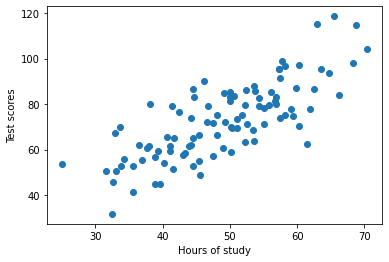

In [7]:
plt.scatter(X,Y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

### Splitting the data into train and validation


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Feature Scaling
This is an optional step. Only to understand the importance of scaling, this is included.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## LinearRegression implementation using Sklearn

In [11]:
lin_reg = LinearRegression()
# fitting the linear model for train data
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# predicting test data on trained model
data_predictions = lin_reg.predict(X_test)


In [72]:
# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) between test and predictions
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, data_predictions)))
print(metrics.mean_absolute_error(y_test, y_pred))

13.522181079909986
10.636354220564037


Text(0, 0.5, 'Test scores')

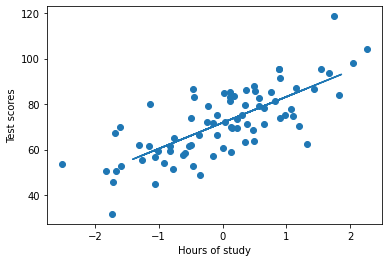

In [70]:
plt.scatter(X_train,y_train)
plt.plot(X_test,data_predictions)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

## Building an ANN

In [51]:
#Initialize an ANN
ann = tf.keras.Sequential()

In [53]:
#Add 1st hidden Layer
ann.add(tf.keras.layers.Dense(units=4, input_dim=1, kernel_initializer='normal', activation='relu'))

In [54]:
#Add 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='relu'))

In [55]:
#Add output Layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='normal'))

In [56]:
#Specify the optimizer and loss fucntions
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [58]:
#Fit the model to the data
ann.fit(X_train, y_train, batch_size = 4, epochs = 100)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 346.1331 - mean_squared_error: 346.1331
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 306.2079 - mean_squared_error: 306.2079
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 269.8364 - mean_squared_error: 269.8364
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 243.0547 - mean_squared_error: 243.0547
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 220.4639 - mean_squared_error: 220.4639
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 201.7267 - mean_squared_error: 201.7267
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 186.9641 - mean_squared_error: 186.9641
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 175.1354 - mean_squared_error: 175.1354
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 165.7352 - mean_squared

In [59]:
ann.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (4, 1)                    2         
_________________________________________________________________
dense_15 (Dense)             (4, 5)                    10        
_________________________________________________________________
dense_16 (Dense)             (4, 10)                   60        
_________________________________________________________________
dense_17 (Dense)             (4, 1)                    11        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [60]:
#Calculate the predictions on test data
y_pred = ann.predict(X_test)

In [61]:
print(y_pred)

[[80.22438 ]
 [81.1877  ]
 [81.59638 ]
 [80.18929 ]
 [68.63617 ]
 [83.91266 ]
 [85.64911 ]
 [55.714756]
 [57.175426]
 [61.389015]
 [93.1096  ]
 [59.34484 ]
 [63.365402]
 [62.520267]
 [66.75904 ]
 [64.51524 ]
 [57.055683]
 [86.84511 ]
 [79.03466 ]
 [67.75514 ]]


In [71]:
# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) between test and predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))

13.504174020855073
10.636354220564037


In [ ]:
plt.scatter(X_test,y_pred)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

Text(0, 0.5, 'Test scores')

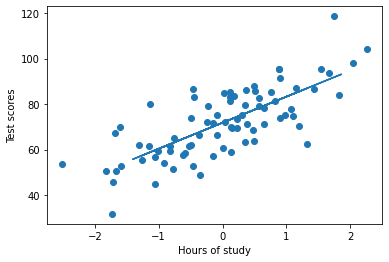

In [67]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')